Sebastian Szczepański S29805 grupa DS_EM_11_12 (12:15) 

In [34]:
import os
from PIL import Image, ImageOps 
from numpy import asarray
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner
from sklearn.model_selection import train_test_split


In [49]:
# Load dataset | Załadowanie zesatwu danych
cwd = os.getcwd()
dt = pd.read_csv(cwd + "\\archive\\annotations_new.csv")
dt.head()

,file_name,width,height,x1,y1,x2,y2,category
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0


In [50]:
# Unify images | Unifikacja obrazów
cwd = os.getcwd()
images_dir = cwd + "\\archive\\images"
images_pngs = os.listdir(images_dir)
numpy_data = []
shapes = []
labels = []
size1 = 45, 45
last_idx = 0
for img_file_name, idx in zip(dt["file_name"], range(len(images_pngs))):
    img = ImageOps.grayscale(Image.open(images_dir + "\\" + img_file_name))
    img = img.crop((dt["x1"].iloc[idx], dt["y1"].iloc[idx], dt["x2"].iloc[idx], dt["y2"].iloc[idx]))  # left, top, right, bottom
    img.thumbnail(size1, Image.Resampling.HAMMING, reducing_gap=5.0)
    img = img.crop((0, 0, 40, 40))  # left, top, right, bottom
    numpy_data.append(asarray(img))
    shapes.append(asarray(img).shape)
    last_idx = idx

with open(cwd + "\\archive\\annotations_new.csv", mode ='r')as file:
  csvFile = csv.reader(file)
  for line in csvFile:
        labels.append(line[7])

df = pd.DataFrame({"images": numpy_data, "shapes": shapes, "labels": labels[1:]})
df.head()


,images,shapes,labels
0,"[[115, 115, 115, 114, 114, 114, 114, 114, 113,...","(40, 40)",0
1,"[[119, 117, 117, 117, 115, 102, 66, 121, 121, ...","(40, 40)",0
2,"[[120, 121, 120, 119, 118, 117, 117, 117, 116,...","(40, 40)",0
3,"[[51, 52, 58, 60, 62, 57, 64, 59, 48, 44, 49, ...","(40, 40)",0
4,"[[64, 78, 87, 54, 52, 130, 123, 160, 130, 151,...","(40, 40)",0


In [51]:
df["shapes"].value_counts

<bound method IndexOpsMixin.value_counts of 0       (40, 40)
1       (40, 40)
2       (40, 40)
3       (40, 40)
4       (40, 40)
          ...   
5993    (40, 40)
5994    (40, 40)
5995    (40, 40)
5996    (40, 40)
5997    (40, 40)
Name: shapes, Length: 5998, dtype: object>

In [52]:
asarray(numpy_data).shape

(5998, 40, 40)

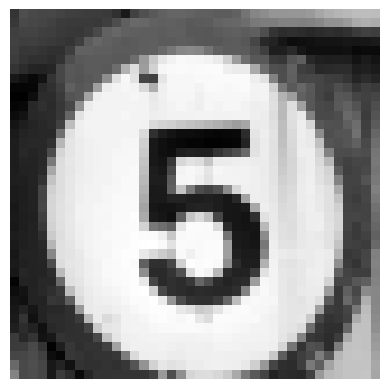

In [53]:
plt.imshow(df["images"].iloc[10], cmap='gray'); plt.axis('off')
plt.show()

In [54]:
# Remove nulls | Usuwanie pustych rubryk
print(f"Number of rows before removing nulls: {len(df)}")
df.dropna(inplace=True)
print(f"Number of rows after removing nulls: {len(df)}")

Number of rows before removing nulls: 5998
Number of rows after removing nulls: 5998


In [55]:
# Split datat to train, valid and test | Podział danych na treningowe, walidacyjne i testowe
X_tv, X_test, y_tv, y_test = train_test_split(asarray(numpy_data).astype(np.float32), asarray(labels[1:]).astype(int),
                                                # stratify=asarray(labels[1:]).astype(int),
                                                shuffle=True,
                                                test_size=0.10)

X_train, X_valid, y_train, y_valid = train_test_split(X_tv, y_tv,
                                                # stratify=y_tv,
                                                shuffle=True,
                                                test_size=0.30)
# X_train = X_train.apply(lambda x: np.array(x, dtype=np.float32) / 255.0)
# X_valid = X_valid.apply(lambda x: np.array(x, dtype=np.float32) / 255.0)
# X_test = X_test.apply(lambda x: np.array(x, dtype=np.float32) / 255.0)
# y_train = y_train.apply(lambda x: np.array(x, dtype=np.float32) / 255.0)
# y_valid = y_valid.apply(lambda x: np.array(x, dtype=np.float32) / 255.0)
# y_test = y_test.apply(lambda x: np.array(x, dtype=np.float32) / 255.0)
# X_train = X_train.to_numpy()
# X_valid = X_valid.to_numpy()
# X_test = X_test.to_numpy()
# y_train = y_train.to_numpy()
# y_valid = y_valid.to_numpy()
# y_test = y_test.to_numpy()
# X_train = X_train.reshape(-1, 40, 40, 3) / 255.0
# X_valid = X_valid.reshape(-1, 40, 40, 3) / 255.0
# X_test = X_test.reshape(-1, 40, 40, 3) / 255.0
X_train = X_train.reshape(-1, 40, 40, 1) / 255.0
X_valid = X_valid.reshape(-1, 40, 40, 1) / 255.0
X_test = X_test.reshape(-1, 40, 40, 1) / 255.0
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)


(3778, 40, 40, 1)
(1620, 40, 40, 1)
(600, 40, 40, 1)
(3778,)
(1620,)
(600,)


In [56]:
asarray(labels[1:]).astype(int)

array([ 0,  0,  0, ..., 56, 57, 57])

In [57]:
pd.Series(y_test).value_counts

<bound method IndexOpsMixin.value_counts of 0      30
1      56
2      30
3      35
4      29
       ..
595     7
596     3
597    24
598    54
599    26
Length: 600, dtype: int32>

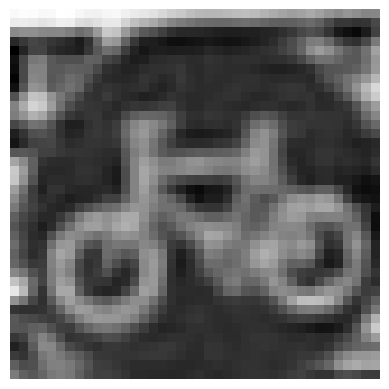

In [58]:
plt.imshow(X_train[709], cmap='gray'); plt.axis('off')
plt.show()

In [45]:
# Model referencyjny - sięć głęboka złożona z samych warstw gęstych Fully Connected

# dostosowanie danych wejściowych pod model referencyjny
X_train = X_train.reshape(-1, 40 * 40)
X_valid = X_valid.reshape(-1, 40 * 40)
X_test = X_test.reshape(-1, 40 * 40)

inputs = keras.Input(shape=(40 * 40,))

x = layers.Dense(64, activation="relu")(inputs)

x = layers.Dense(128, activation="relu")(x)

x = layers.Dense(256, activation="relu")(x)

x = layers.Dense(512, activation="relu")(x)

x = layers.Dense(1024, activation="relu")(x)

outputs = layers.Dense(58, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="road_signs.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=256,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks)

#Evaluating the model on the test set


test_model = keras.models.load_model("road_signs.keras")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0860 - loss: 3.7393 - val_accuracy: 0.2025 - val_loss: 3.1320
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2808 - loss: 2.8005 - val_accuracy: 0.4179 - val_loss: 2.2084
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4774 - loss: 1.9525 - val_accuracy: 0.5093 - val_loss: 1.6768
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5718 - loss: 1.4722 - val_accuracy: 0.6130 - val_loss: 1.3797
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6399 - loss: 1.2225 - val_accuracy: 0.6500 - val_loss: 1.2290
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7012 - loss: 0.9941 - val_accuracy: 0.7315 - val_loss: 1.0135
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7855 - loss: 0.7691 - val_accuracy: 0.6815 - val_loss: 1.1262
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7904 - loss: 0.7193 - val_accuracy: 0.7796 - v

In [46]:
# Generate architecture schema fo the reference model | Wygenerowanie schematu architektury dla modelu referencyjnego

inputs = keras.Input(shape=(40 * 40,))

x = layers.Dense(64, activation="relu")(inputs)

x = layers.Dense(128, activation="relu")(x)

x = layers.Dense(256, activation="relu")(x)

x = layers.Dense(512, activation="relu")(x)

x = layers.Dense(1024, activation="relu")(x)

outputs = layers.Dense(58, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 58)             │        59,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 860,154 (3.28 MB)

 Trainable params: 860,154 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

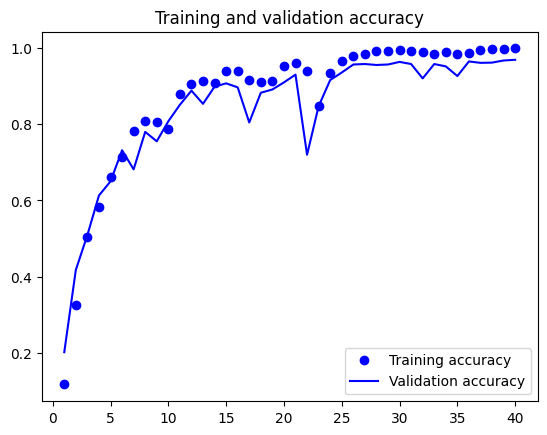

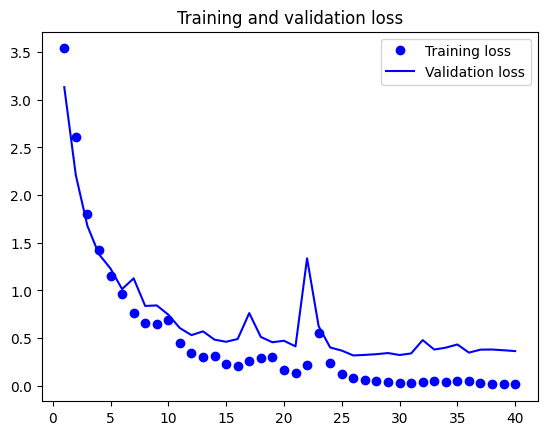

In [47]:
# Diagnostic chart for reference model | Wykres diagnostyczny dla modelu referyncyjnego

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Solution with CNN (target network)| Rozwiązanie z zastosowaniem sieci konwolucyjnej (docelowa sieć)

inputs = keras.Input(shape=(40, 40, 1))

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(rate=0.25)(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(rate=0.25)(x)

x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(rate=0.25)(x)

x = layers.Flatten()(x)


x = layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(rate=0.5)(x)

x = layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(rate=0.5)(x)

outputs = layers.Dense(58, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="road_signs_BM.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        restore_best_weights=True,
        monitor='loss',
        patience=3)
]
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks)

#Evaluating the model on the test set

test_model = keras.models.load_model("road_signs_BM.keras")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 687ms/step - accuracy: 0.0403 - loss: 3.9599 - val_accuracy: 0.1068 - val_loss: 3.8921
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - accuracy: 0.0556 - loss: 3.7712 - val_accuracy: 0.0802 - val_loss: 3.8175
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 652ms/step - accuracy: 0.0751 - loss: 3.7110 - val_accuracy: 0.0802 - val_loss: 3.7781
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 642ms/step - accuracy: 0.0861 - loss: 3.6770 - val_accuracy: 0.1401 - val_loss: 3.5642
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 661ms/step - accuracy: 0.1163 - loss: 3.5901 - val_accuracy: 0.1741 - val_loss: 3.2891
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 687ms/step - accuracy: 0.1743 - loss: 3.3596 - val_accuracy: 0.2469 - val_loss: 3.2404
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 649ms/step - accuracy: 0.2379 - loss: 3.0740 - val_accuracy: 0.3142 - val_loss: 2.6492
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 646ms/step - accuracy: 0.2989 - loss: 2.7238 - val_accuracy: 0.3679 - v

In [ ]:
# Generate architecture schema fo the target model | Wygenerowanie schematu architektury dla modelu docelowego

inputs = keras.Input(shape=(40, 40, 1))

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(rate=0.25)(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(rate=0.25)(x)

x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(rate=0.25)(x)

x = layers.Flatten()(x)


x = layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(rate=0.5)(x)

x = layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(rate=0.5)(x)

outputs = layers.Dense(58, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 40, 40, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 38, 38, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 17, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 58)             │        29,754 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121,082 (4.28 MB)

 Trainable params: 1,121,082 (4.28 MB)

 Non-trainable params: 0 (0.00 B)

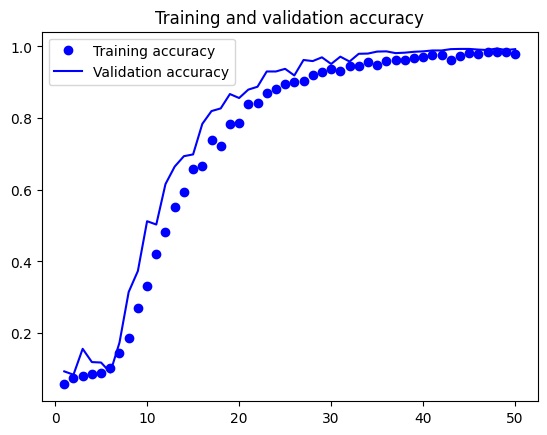

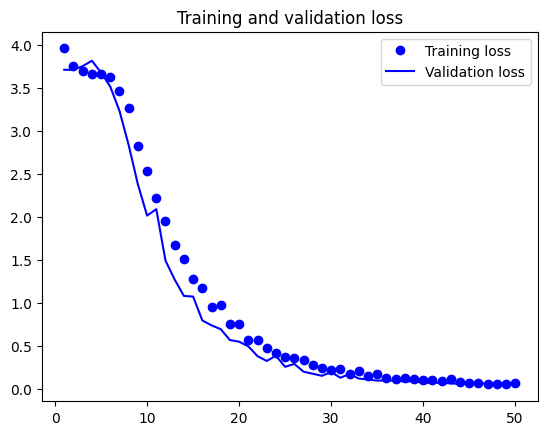

In [ ]:
# Display curves of loss and accuracy during training | Wyświetlenie krzywych straty i dokładności w trakcie procesu trenowania modelu

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Define possibilities for model tuner | Definiowanie możliwości do rozpatrzenia dla tunera modelu

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(
      hp.Choice('filters', [32, 256, 512]),
      kernel_size=(3, 3),
      activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))

  model.add(keras.layers.Conv2D(
      hp.Choice('filters', [32, 256, 512]),
      kernel_size=(3, 3),
      activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))

  model.add(keras.layers.Conv2D(
      hp.Choice('filters', [32, 256, 512]),
      kernel_size=(3, 3),
      activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
        
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(
      hp.Choice('units', [128, 256, 512]),
      activation='relu'))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))

  model.add(keras.layers.Dense(
      hp.Choice('units', [128, 256, 512]),
      activation='relu'))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))

  model.add(keras.layers.Dense(58, activation="softmax"))

  model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=["accuracy"])
  return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    overwrite = True)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
filters (Choice)
{'default': 32, 'conditions': [], 'values': [32, 256, 512], 'ordered': True}
dropout (Boolean)
{'default': False, 'conditions': []}
units (Choice)
{'default': 128, 'conditions': [], 'values': [128, 256, 512], 'ordered': True}


In [ ]:
# Find best model | Szukanie najlepszego modelu
tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),  batch_size=512)
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 19m 20s]
val_loss: 2.432497978210449

Best val_loss So Far: 1.0083973407745361
Total elapsed time: 01h 07m 15s


c:\Users\sebex\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Build the model. Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 40, 40, 1))
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 38, 38, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 19, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 17, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 58)             │        29,754 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,655,290 (10.13 MB)

 Trainable params: 2,655,290 (10.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 1 summary
Hyperparameters:
filters: 256
dropout: False
units: 512
Score: 1.0083973407745361

Trial 2 summary
Hyperparameters:
filters: 512
dropout: False
units: 512
Score: 1.9605389833450317

Trial 3 summary
Hyperparameters:
filters: 32
dropout: True
units: 128
Score: 2.2684786319732666

Trial 4 summary
Hyperparameters:
filters: 512
dropout: True
units: 256
Score: 2.432497978210449

Trial 0 summary
Hyperparameters:
filters: 512
dropout: True
units: 128
Score: 3.2317047119140625


In [ ]:
# Get the best hyperparameters.
best_hps = tuner.get_best_hyperparameters()

# Build the model with the best hp.
tuned_model = build_model(best_hps[0])

# Fit with the entire dataset.
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="road_signs_best_tuned.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        restore_best_weights=True,
        monitor='loss',
        patience=3)]

history = tuned_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks)

# Evaluate the model on the test set | Ewaluacja modelu na zestawie danych testowych
test_tuned_model = keras.models.load_model("road_signs_best_tuned.keras")
test_loss, test_acc = test_tuned_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.0519 - loss: 4.0789 - val_accuracy: 0.0889 - val_loss: 3.8252
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.0918 - loss: 3.7426 - val_accuracy: 0.1025 - val_loss: 3.6661
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.0911 - loss: 3.6545 - val_accuracy: 0.0938 - val_loss: 3.6349
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.1134 - loss: 3.5986 - val_accuracy: 0.1907 - val_loss: 3.6199
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.1480 - loss: 3.5446 - val_accuracy: 0.2414 - val_loss: 3.3864
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.2198 - loss: 3.2454 - val_accuracy: 0.2154 - val_loss: 2.9901
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.2987 - loss: 2.7555 - val_accuracy: 0.4019 - val_loss: 2.3999
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.3971 - loss: 2.2857 - val_accuracy: 0.4895 - val_loss: 1.9867


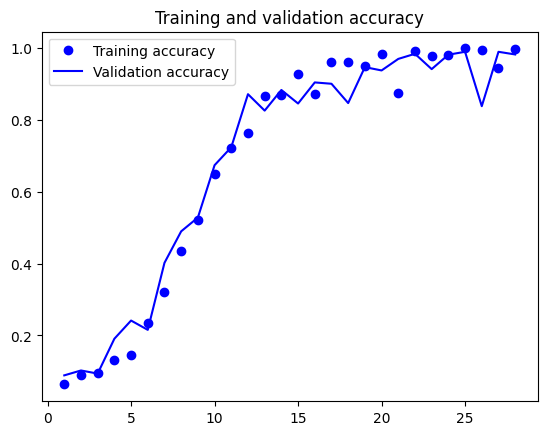

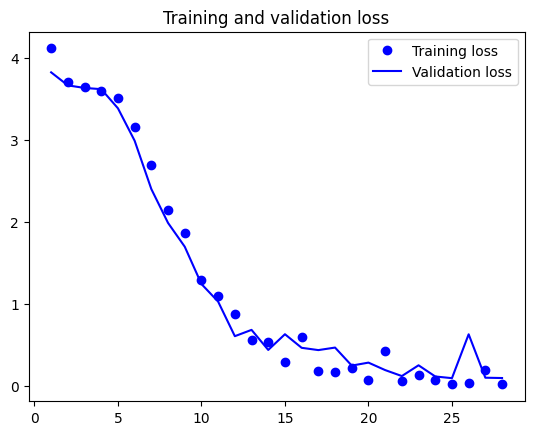

In [ ]:
# Display curves of loss and accuracy during training | Wyświetlenie krzywych straty i dokładności w trakcie procesu trenowania modelu

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()